In [1]:
import matplotlib
%matplotlib inline
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
0


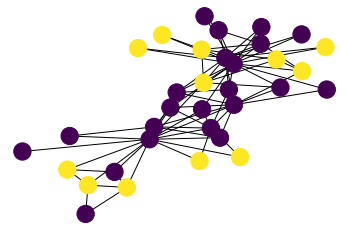

In [100]:
initialize()
print(g.nodes)
for i in range(10):
    update()
observe()
print(g.nodes[0]['state'])

In [3]:
g

In [106]:
initialize()
step_count=0
count_homogeneous=0
for i in range(1000):
    a = g.copy()
    list_state_a=[]
    for i in a.nodes:
        list_state_a.append(a.nodes[i]['state'])
    update()
    step_count +=1
    list_state_g=[]
    for i in g.nodes:
        list_state_g.append(g.nodes[i]['state'])
    if list_state_a == list_state_g:
        count_homogeneous+=1
    else:
        count_homogeneous = 0
    if count_homogeneous ==10: #if the states are similar 10 times in a row, probably that's homogeneity
        break


In [108]:
length=[]
for trial in range(1000):
    initialize()
    step_count=0
    count_homogeneous=0
    for i in range(1000):
        a = g.copy()
        list_state_a=[]
        for i in a.nodes:
            list_state_a.append(a.nodes[i]['state'])
        update()
        step_count +=1
        list_state_g=[]
        for i in g.nodes:
            list_state_g.append(g.nodes[i]['state'])
        if list_state_a == list_state_g:
            count_homogeneous+=1
        else:
            count_homogeneous = 0
        if count_homogeneous ==10: #if the states are similar 10 times in a row, probably that's homogeneity
            break
    length.append(step_count)

(array([292., 346., 203.,  95.,  29.,  19.,   9.,   3.,   2.,   2.]),
 array([ 11. ,  69.5, 128. , 186.5, 245. , 303.5, 362. , 420.5, 479. ,
        537.5, 596. ]),
 <a list of 10 Patch objects>)

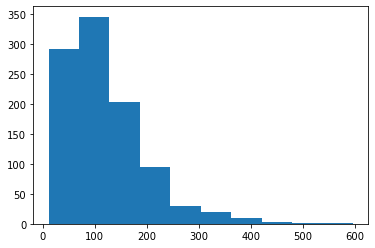

In [109]:
plt.hist(length)

In [110]:
#reversed
def update2():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

In [113]:
length2=[]
for trial in range(1000):
    initialize()
    step_count=0
    count_homogeneous=0
    for i in range(1000):
        a = g.copy()
        list_state_a=[]
        for i in a.nodes:
            list_state_a.append(a.nodes[i]['state'])
        update2()
        step_count +=1
        list_state_g=[]
        for i in g.nodes:
            list_state_g.append(g.nodes[i]['state'])
        if list_state_a == list_state_g:
            count_homogeneous+=1
        else:
            count_homogeneous = 0
        if count_homogeneous ==10: #if the states are similar 10 times in a row, probably that's homogeneity
            break
    length2.append(step_count)

(array([368., 293., 169.,  92.,  44.,  19.,   6.,   5.,   1.,   3.]),
 array([  10.,  109.,  208.,  307.,  406.,  505.,  604.,  703.,  802.,
         901., 1000.]),
 <a list of 10 Patch objects>)

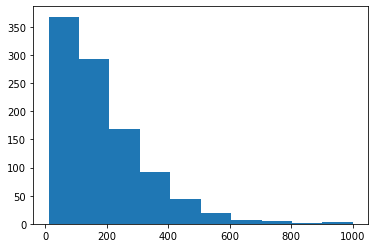

In [114]:
plt.hist(length2)

In [128]:
#edge-based
def update3():
    global g
    edge = rd.choice(list(g.edges))
    edge = list(edge)
    listener = rd.choice(edge)
    edge.remove(listener)
    speaker = rd.choice(edge)
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

In [131]:
length3=[]
for trial in range(1000):
    initialize()
    step_count=0
    count_homogeneous=0
    for i in range(1000):
        a = g.copy()
        list_state_a=[]
        for i in a.nodes:
            list_state_a.append(a.nodes[i]['state'])
        update3()
        step_count +=1
        list_state_g=[]
        for i in g.nodes:
            list_state_g.append(g.nodes[i]['state'])
        if list_state_a == list_state_g:
            count_homogeneous+=1
        else:
            count_homogeneous = 0
        if count_homogeneous ==10: #if the states are similar 10 times in a row, probably that's homogeneity
            break
    length3.append(step_count)

(array([417., 314., 157.,  73.,  19.,   9.,   5.,   2.,   1.,   3.]),
 array([  10.,  109.,  208.,  307.,  406.,  505.,  604.,  703.,  802.,
         901., 1000.]),
 <a list of 10 Patch objects>)

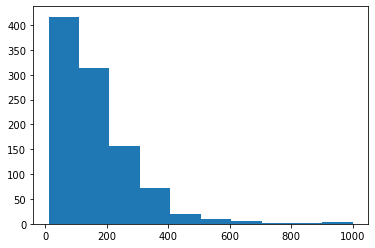

In [132]:
plt.hist(length3)

Comments: It seems the pull approach (original) is the fastest to converge, while the reversed approach is the slowest to converge (the edge-based approach is only marginally faster). It makes sense since Sayama says the pull approach is not as fair, since more popular nodes tend to be chosen to be speakers -> beliefs propagate faster.